In [1]:
import pandas as pd
from utils import *

In [2]:
df_complete = pd.read_csv('table.csv')

### TARGET = Yield strength / MPa

In [3]:
df_complete["Yield strength / MPa"].isna().mean()

np.float64(0.5278450363196125)

**STEP 1**: We extract rows with "Yield strength / MPa" not None to create our dataset.

In [4]:
df = df_complete.dropna(subset=['Yield strength / MPa'])
df.shape

(780, 44)

**STEP 2**: Handle categorical features
- 'Type of weld' feature

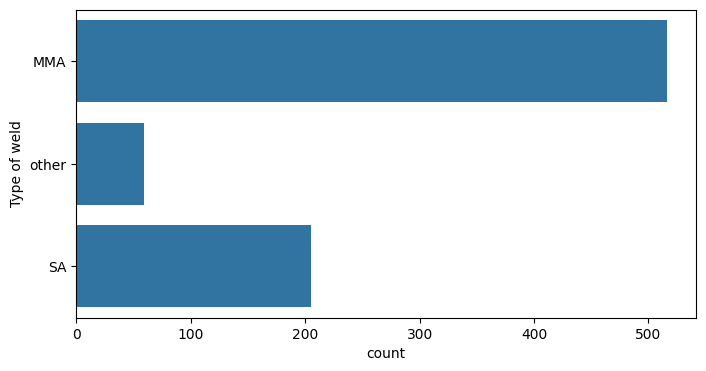

In [71]:
types_of_weld = ['MMA', 'SA', 'other']

df.loc[:, 'Type of weld'] = df['Type of weld'].apply(lambda x: x if x in types_of_weld else 'other')
plot_distribution(df['Type of weld'])

In [101]:
df_encoded = pd.get_dummies(df, columns=['Type of weld'], prefix='weld', dtype=int,).drop(columns=['weld_other'])

- 'AC or DC' feature

In [96]:
cpt = 0
for i in range(len(df_encoded)):
    if df_encoded.iloc[i]["AC or DC"] is None and df_encoded.iloc[i]['Electrode positive or negative'] is not None:  # Correct None check
        cpt += 1
        if df_encoded.iloc[i]['Electrode positive or negative'] == 0:
            df_encoded.iloc[i]["AC or DC"] = "AC"
        else: 
            df_encoded.iloc[i]["AC or DC"] = "DC"
            
#This did not do anything

In [102]:
mapping_dict = {'AC': 0, 'DC': 1}
df_encoded['AC or DC'] = df_encoded['AC or DC'].map(mapping_dict)

- 'Electrode positive or negative' feature

In [103]:
mapping_dict = {'+': 1, '0': 0, '-': -1}
df_encoded['Electrode positive or negative'] = df_encoded['Electrode positive or negative'].map(mapping_dict)